#1. Dependencies installation and setup


In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove bad images

In [5]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [6]:
data_dir = 'data'

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in ext list data/Front Page/home_post_2.gif
Image not in ext list data/Front Page/0f0a69dbda2984ebeaf8df6a80cadca8465ed0f7-1600x900.jpg
Image not in ext list data/Front Page/homepage-design-31086.jpg
Image not in ext list data/Front Page/ngwebsites-Therapywebsite7CdesignbyJodiNeufeldDesign7CSquarespacewebdesigner.jpg
Image not in ext list data/Front Page/Portfolio-website-of-the-product-designer-and-front-end-developer-Adham-Dannaway-1024x869.webp
Image not in ext list data/Front Page/21d23aacc75f36df01310f8782e8102a0882276f-1600x900.jpg
Image not in ext list data/Front Page/7c7a7ec4c930576d7e7951fb688391224eb40709-1600x900.jpg
Image not in ext list data/Front Page/html-home-page-example-1.webp
Image not in ext list data/Front Page/0ea037e387443a2c4601ef99fa2882343d2cf73b-1600x900.jpg
Image not in ext list data/Front Page/066de7d176b5d943df3601d83d2e755eb5686df3-1600x900.jpg
Image not in ext list data/Front Page/b70b0d733f04b82000b2ebcd299fd387dffed4f8-1600x900.jpg
Image not 

# 3. Load Data

In [9]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 364 files belonging to 2 classes.


In [12]:
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
# Class 1 = Front Page
# Class 0 = Checkout Page
batch[1]

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int32)

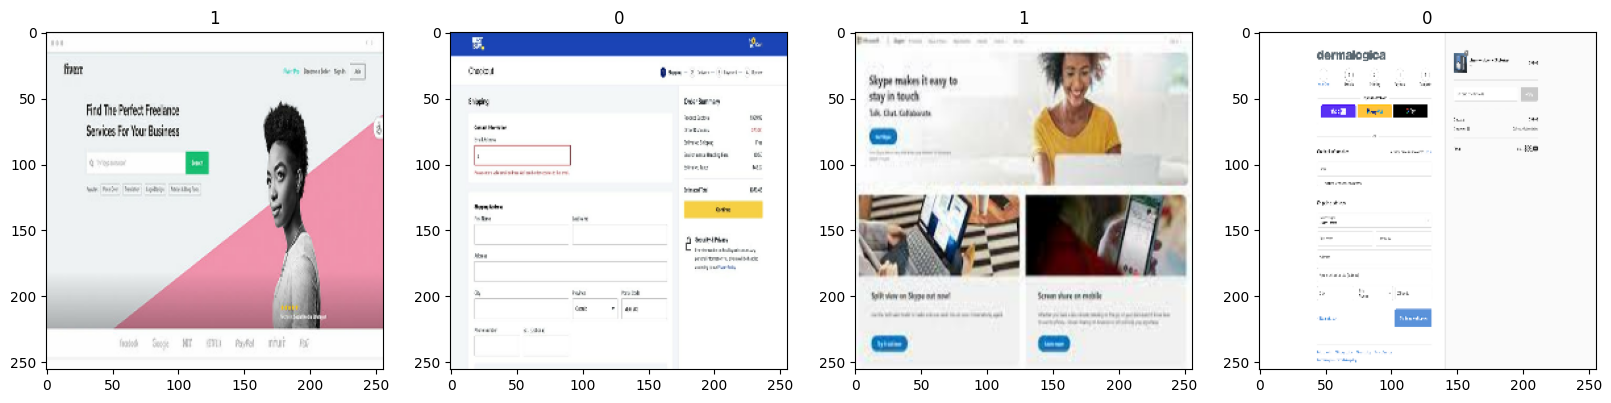

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
scaled = batch[0] / 255

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
scaled_iterator = data.as_numpy_iterator()

In [19]:
batch = scaled_iterator.next()

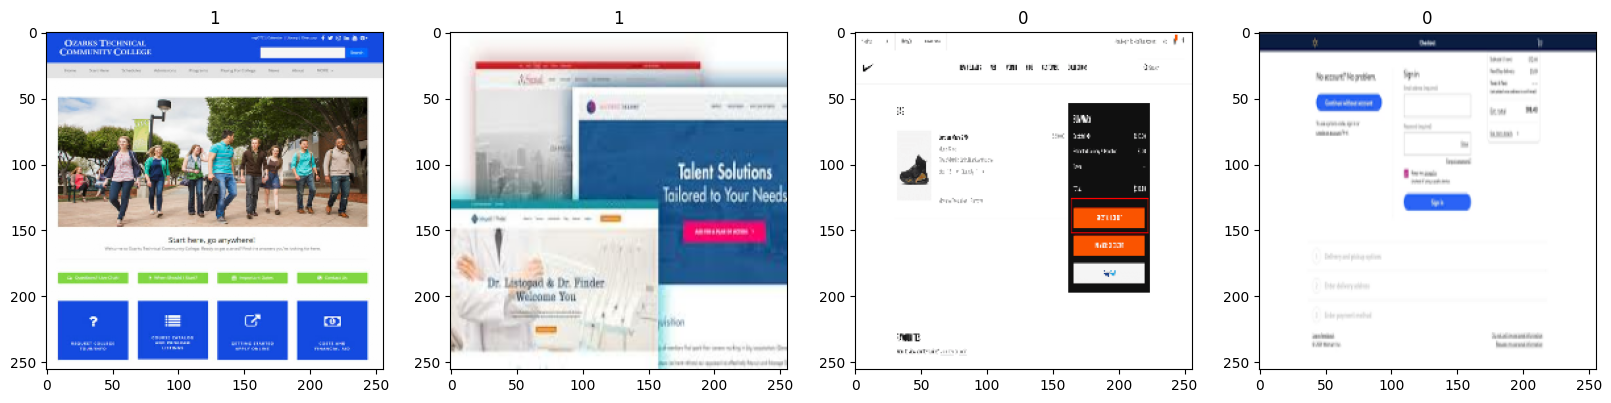

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [21]:
len(data)

12

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [23]:
train_size + val_size + test_size

11

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 24s 2s/step - loss: 0.8209 - accuracy: 0.6016 - val_loss: 0.3905 - val_accuracy: 0.8594
Epoch 2/20
8/8 [==============================] - 19s 2s/step - loss: 0.3708 - accuracy: 0.8750 - val_loss: 0.2788 - val_accuracy: 0.9062
Epoch 3/20
8/8 [==============================] - 18s 2s/step - loss: 0.4381 - accuracy: 0.8125 - val_loss: 0.4491 - val_accuracy: 0.7656
Epoch 4/20
8/8 [==============================] - 18s 2s/step - loss: 0.3276 - accuracy: 0.8711 - val_loss: 0.3261 - val_accuracy: 0.8906
Epoch 5/20
8/8 [==============================] - 20s 2s/step - loss: 0.2056 - accuracy: 0.9531 - val_loss: 0.1623 - val_accuracy: 0.9375
Epoch 6/20
8/8 [==============================] - 18s 2s/step - loss: 0.1571 - accuracy: 0.9453 - val_loss: 0.1155 - val_accuracy: 0.9844
Epoch 7/20
8/8 [==============================] - 19s 2s/step - loss: 0.1182 - accuracy: 0.9570 - val_loss: 0.0967 - val_accuracy: 0.9688
Epoch 8/20
8/8 [==================

# 8. Plot Performance

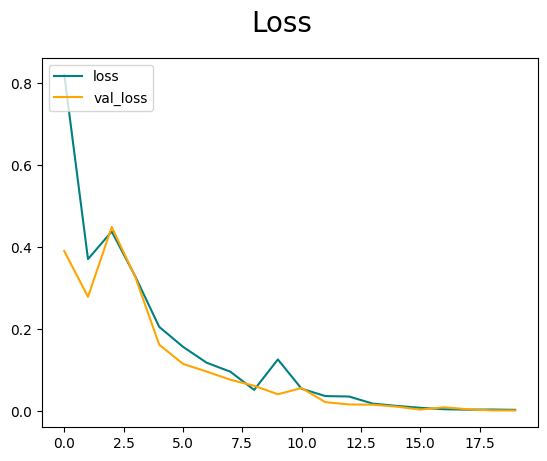

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

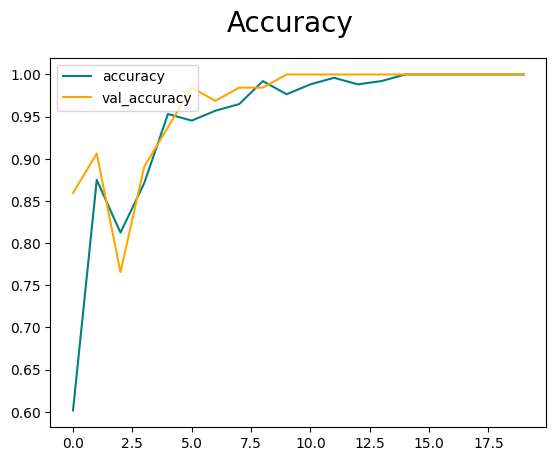

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 550ms/step


In [39]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [40]:
import cv2

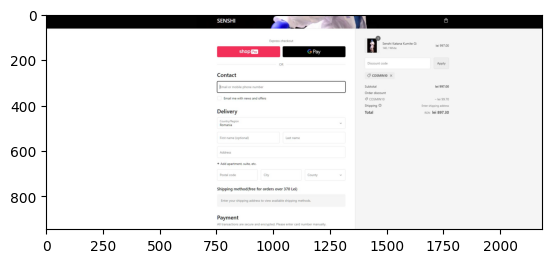

In [55]:
img = cv2.imread('CheckoutPageTest.jpeg')
plt.imshow(img)
plt.show()

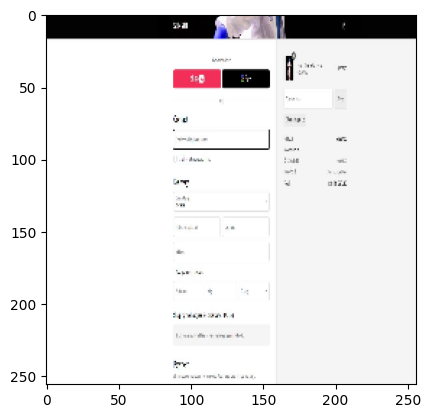

In [56]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
np.expand_dims(resize, 0)

array([[[[  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         ...,
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.]],

        [[  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         ...,
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.]],

        [[  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         ...,
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [245., 245., 245.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [245., 245., 245.],
         [245., 245., 245.],
         [245., 245., 245.]],

        [[255., 255., 255.],
       

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [59]:
yhat

array([[0.17504188]], dtype=float32)

In [60]:
if yhat > 0.5:
    print(f'Predicted class is Front Page')
else:
    print(f'Predicted class is Checkout Page')

Predicted class is Checkout


# 11. Save the Model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','pagedeaconu.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [63]:
new_model = load_model(os.path.join('models', 'pagedeaconu.h5'))

In [64]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 138ms/step


In [65]:
if yhat > 0.5:
    print(f'Predicted class is Front Page')
else:
    print(f'Predicted class is Checkout Page')

Predicted class is Checkout Page
